# Some EDA

In [1]:
# DS essentials
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# python support
import re
import string
import datetime
import pickle 
from collections import Counter

# NLTK
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import words, stopwords, wordnet
from wordcloud import WordCloud
from nltk import FreqDist

# sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# spacy
import spacy

# emoji support!
import emoji

from preprocessing_funcs import clean_tweet, get_hashtags, get_emojis, emoji_as_words

In [2]:
with open('../data_files/processed_tweets.pickle', 'rb') as read_file:
    tweets = pickle.load(read_file)

In [3]:
tweets.head()

,text,processed
0,#IslamKills Are you trying to say that there w...,islam kill try say terrorist attack europe ref...
1,"Clinton: Trump should’ve apologized more, atta...",clinton trump apologize attack little
2,RT @ltapoll: Who was/is the best president of ...,well president past retweet
3,RT @jww372: I don't have to guess your religio...,guess religion christmas aftermath
4,RT @Shareblue: Pence and his lawyers decided w...,pence lawyer decide official email public can see


## Raw Tweets WordCloud

In [4]:
raw_words = " ".join(tweets.text.values).split()

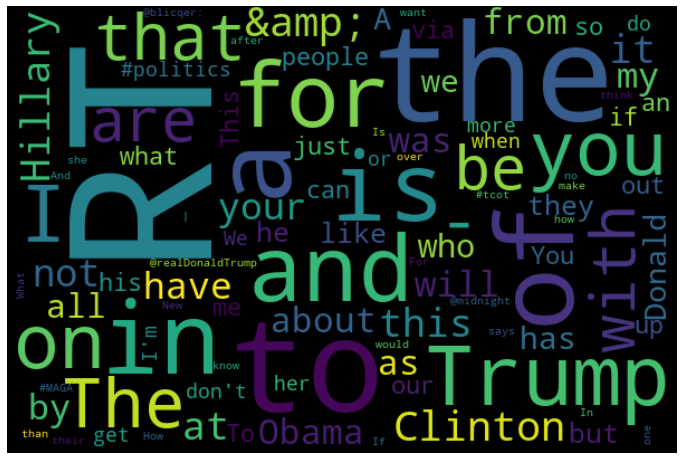

In [5]:
raw_fdist = FreqDist(raw_words)

wc = WordCloud(width=600, height=400, max_words=100).generate_from_frequencies(raw_fdist)
plt.figure(figsize=(12, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

## Processed Tweets WordCloud

In [6]:
processed_words = " ".join(tweets.processed.values).split()

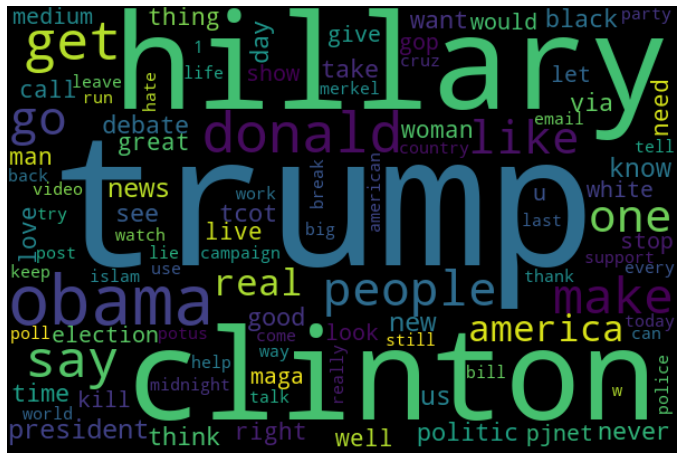

In [7]:
fdist_proc = FreqDist(processed_words)

wc = WordCloud(width=600, height=400, max_words=100).generate_from_frequencies(fdist_proc)
plt.figure(figsize=(12, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [8]:
fdist_proc.most_common(10)

[('trump', 38879),
 ('hillary', 17841),
 ('clinton', 16255),
 ('obama', 9788),
 ('donald', 9312),
 ('get', 8883),
 ('say', 8216),
 ('make', 7347),
 ('people', 7097),
 ('go', 7011)]

Most common n-grams

In [9]:
stop_words = stopwords.words('english')

In [10]:
tokens_proc = [w for w in nltk.word_tokenize(" ".join(tweets.processed.values)) if w not in stop_words]

In [11]:
from nltk.util import ngrams 

def get_frequent_ngram(tokens, ngram, n=10):
    """Find most common n n-grams in tokens."""
    n_grams = ngrams(tokens, ngram)
    freq_dist = FreqDist(n_grams)
    top_freq = freq_dist.most_common(n)
    return pd.DataFrame(top_freq, columns=["ngram", "count"])

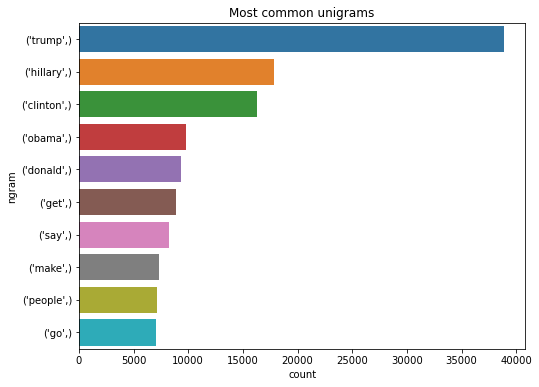

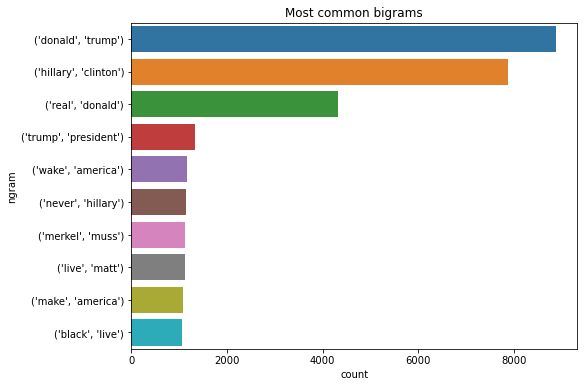

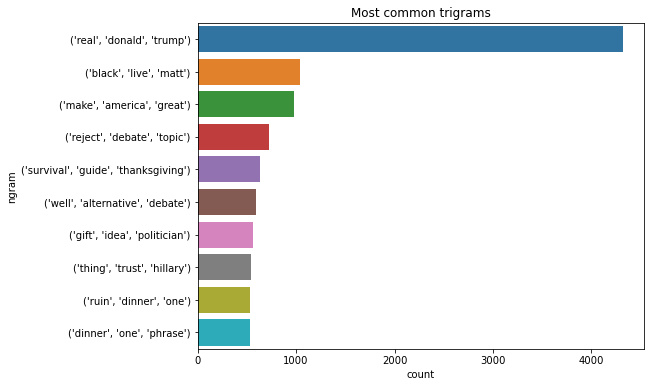

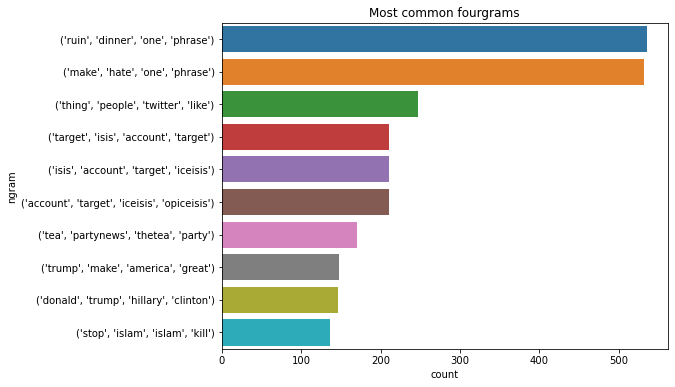

In [12]:
# Get frequent ngrams for all 4
for i in range(1,5):
    mapping = {1:"uni", 2:"bi", 3:"tri", 4:"four"}
    plt.figure(figsize=(8,6))
    sns.barplot(x="count", y="ngram", data=get_frequent_ngram(tokens_proc, i, 10))
    plt.title(f"Most common {mapping[i]}grams");

## Hashtags WordCloud

In [13]:
tweets['hashtags'] = tweets['text'].map(get_hashtags)

In [14]:
tweets.head()

,text,processed,hashtags
0,#IslamKills Are you trying to say that there w...,islam kill try say terrorist attack europe ref...,[IslamKills]
1,"Clinton: Trump should’ve apologized more, atta...",clinton trump apologize attack little,[]
2,RT @ltapoll: Who was/is the best president of ...,well president past retweet,[]
3,RT @jww372: I don't have to guess your religio...,guess religion christmas aftermath,[ChristmasAftermath]
4,RT @Shareblue: Pence and his lawyers decided w...,pence lawyer decide official email public can see,[]


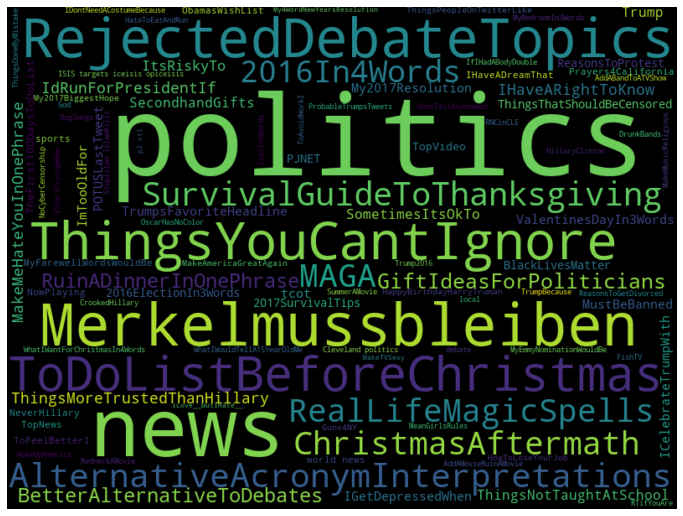

In [15]:
fdist_hashtags = FreqDist(tweets['hashtags'].apply(lambda x: " ".join(x)))

wc = WordCloud(width=800, height=600, max_words=100).generate_from_frequencies(fdist_hashtags)
plt.figure(figsize=(12, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [16]:
top_20_hashtags = fdist_hashtags.most_common(21)
top_20_hashtags

[('', 103115),
 ('politics', 3285),
 ('news', 1497),
 ('Merkelmussbleiben', 677),
 ('RejectedDebateTopics', 671),
 ('ThingsYouCantIgnore', 616),
 ('ToDoListBeforeChristmas', 604),
 ('AlternativeAcronymInterpretations', 576),
 ('SurvivalGuideToThanksgiving', 569),
 ('RealLifeMagicSpells', 551),
 ('MAGA', 549),
 ('ChristmasAftermath', 545),
 ('2016In4Words', 537),
 ('GiftIdeasForPoliticians', 519),
 ('BetterAlternativeToDebates', 512),
 ('RuinADinnerInOnePhrase', 509),
 ('ThingsMoreTrustedThanHillary', 505),
 ('IdRunForPresidentIf', 503),
 ('MakeMeHateYouInOnePhrase', 497),
 ('IHaveARightToKnow', 480),
 ('ItsRiskyTo', 452)]

In [17]:
top_20_hashtags.pop(0)

('', 103115)

In [18]:
len(top_20_hashtags)
top_20_hashtags

[('politics', 3285),
 ('news', 1497),
 ('Merkelmussbleiben', 677),
 ('RejectedDebateTopics', 671),
 ('ThingsYouCantIgnore', 616),
 ('ToDoListBeforeChristmas', 604),
 ('AlternativeAcronymInterpretations', 576),
 ('SurvivalGuideToThanksgiving', 569),
 ('RealLifeMagicSpells', 551),
 ('MAGA', 549),
 ('ChristmasAftermath', 545),
 ('2016In4Words', 537),
 ('GiftIdeasForPoliticians', 519),
 ('BetterAlternativeToDebates', 512),
 ('RuinADinnerInOnePhrase', 509),
 ('ThingsMoreTrustedThanHillary', 505),
 ('IdRunForPresidentIf', 503),
 ('MakeMeHateYouInOnePhrase', 497),
 ('IHaveARightToKnow', 480),
 ('ItsRiskyTo', 452)]

In [19]:
hashtag_df = pd.DataFrame(top_20_hashtags, columns=["hashtag", "count"])
hashtag_df.head()

,hashtag,count
0,politics,3285
1,news,1497
2,Merkelmussbleiben,677
3,RejectedDebateTopics,671
4,ThingsYouCantIgnore,616


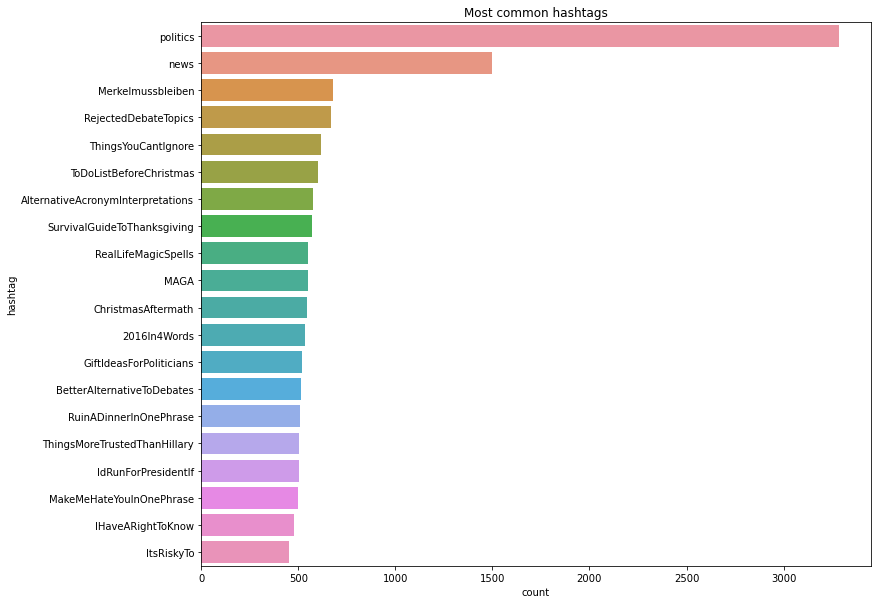

In [20]:
plt.figure(figsize=(12,10))
sns.barplot(x="count", y="hashtag", data=hashtag_df, color='#4e79a7')
plt.title('Most common hashtags');

## Emojis

In [21]:
tweets.head(3)

,text,processed,hashtags
0,#IslamKills Are you trying to say that there w...,islam kill try say terrorist attack europe ref...,[IslamKills]
1,"Clinton: Trump should’ve apologized more, atta...",clinton trump apologize attack little,[]
2,RT @ltapoll: Who was/is the best president of ...,well president past retweet,[]


In [22]:
tweets['emojis'] = tweets['text'].map(get_emojis)

In [23]:
em_df = tweets[tweets['emojis'].str.len() != 0]

In [24]:
em_df = em_df[['text', 'emojis']]

In [25]:
em_df['em_words'] = em_df['emojis'].map(emoji_as_words)

In [26]:
em_df

,text,emojis,em_words
12,RT @AIIAmericanGirI: 🇺🇸\r\nObama to add 450 Ir...,"[🇺, 🇸]","[regional_indicator_symbol_letter_u, regional_..."
31,RT @alisajoy331: Prayer sent Never stop fighti...,[💔],[broken_heart]
63,RT @Veteran4Trump: A picture you will never se...,[👍],[thumbs_up]
77,RT @funkflex: (Video) Jeezy On Donald Trump: “...,[🤔],[thinking_face]
89,The most honest Hillary's poster I've seen 😂\n...,[😂],[face_with_tears_of_joy]
...,...,...,...
203352,RT @1stevetaylor: #humor #funnypics #demotivat...,[😺],[grinning_cat_face]
203401,RT @blicqer: ✉✉❌❌❎❎ The BEST Weekend Breaks In...,"[✉, ✉, ❌, ❌, ❎, ❎]","[envelope, envelope, cross_mark, cross_mark, c..."
203408,RT @50th_President: I forgot how much Trump tr...,"[😂, 😂, 😂, 😂, 😂, 😂, 😂]","[face_with_tears_of_joy, face_with_tears_of_jo..."
203461,RT @daryljwalters: #GoodMorning One prayer awa...,"[🙌, 🏾]","[raising_hands, medium_dark_skin_tone]"


Notes: 
* skin-tone modifiers
* american flag = US --> need to be able to render that

In [27]:
skin_tone_modifiers = ['light_skin_tone', 'medium_light_skin_tone',
                       'medium_skin_tone', 'medium_dark_skin_tone',
                       'dark_skin_tone']

In [28]:
emw = list(em_df.em_words)

em_list = [em for em_list in emw for em in em_list if em not in skin_tone_modifiers]

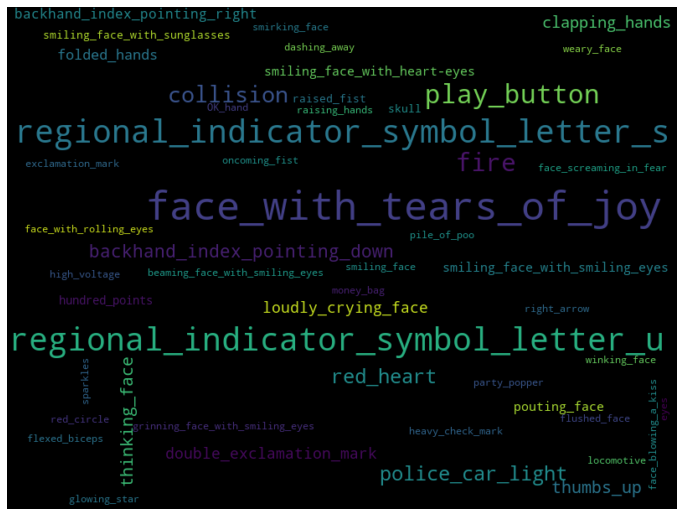

In [29]:
fdist_emojis = FreqDist(em_list)

wc = WordCloud(width=800, height=600, max_words=50).generate_from_frequencies(fdist_emojis)
plt.figure(figsize=(12, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [30]:
top_20_emojis = fdist_emojis.most_common(20)
top_20_emojis

[('face_with_tears_of_joy', 2951),
 ('regional_indicator_symbol_letter_s', 1836),
 ('regional_indicator_symbol_letter_u', 1833),
 ('play_button', 1178),
 ('fire', 1119),
 ('collision', 912),
 ('police_car_light', 679),
 ('red_heart', 654),
 ('backhand_index_pointing_down', 537),
 ('thumbs_up', 495),
 ('thinking_face', 485),
 ('clapping_hands', 438),
 ('double_exclamation_mark', 398),
 ('loudly_crying_face', 390),
 ('folded_hands', 348),
 ('backhand_index_pointing_right', 325),
 ('pouting_face', 289),
 ('smiling_face_with_heart-eyes', 284),
 ('smiling_face_with_smiling_eyes', 270),
 ('hundred_points', 237)]

In [31]:
emoji_df = pd.DataFrame(top_20_emojis, columns=["emoji_text", "count"])
emoji_df.head()

,emoji_text,count
0,face_with_tears_of_joy,2951
1,regional_indicator_symbol_letter_s,1836
2,regional_indicator_symbol_letter_u,1833
3,play_button,1178
4,fire,1119


In [32]:
def emojize(emo):
    emojified = emoji.emojize(':' + emo + ':')
    return emojified

In [33]:
emoji_df['emoji'] = emoji_df['emoji_text'].map(emojize)

In [34]:
emoji_df = emoji_df[['emoji', 'emoji_text', 'count']]
emoji_df

,emoji,emoji_text,count
0,😂,face_with_tears_of_joy,2951
1,🇸,regional_indicator_symbol_letter_s,1836
2,🇺,regional_indicator_symbol_letter_u,1833
3,▶,play_button,1178
4,🔥,fire,1119
5,💥,collision,912
6,🚨,police_car_light,679
7,❤,red_heart,654
8,👇,backhand_index_pointing_down,537
9,👍,thumbs_up,495


In [35]:
# emojis_list = list(emoji_df['emoji'])
# count_list = list(emoji_df['count'])

In [36]:
# plt.bar(emojis_list, count_list, color='#4e79a7')

AttributeError: module 'matplotlib.pyplot' has no attribute 'ytick'

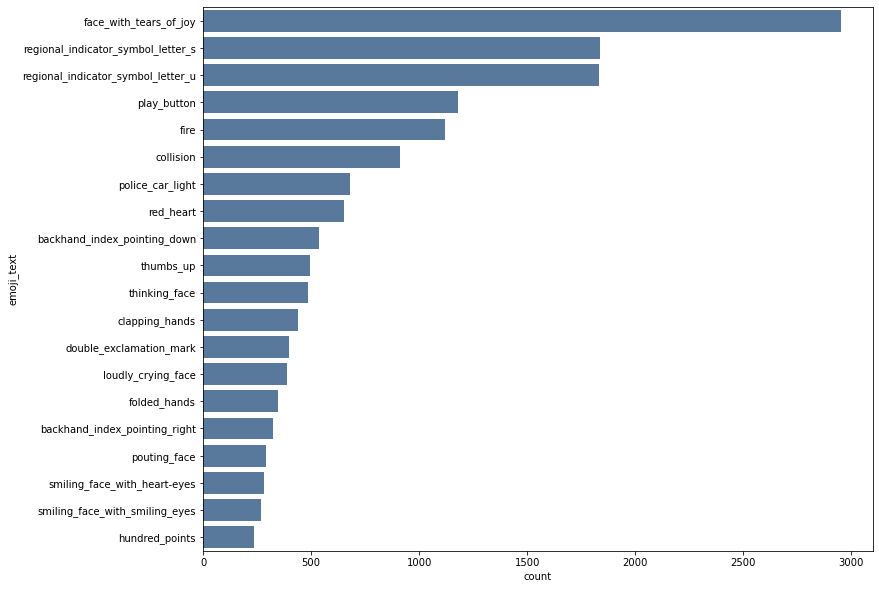

In [38]:
plt.figure(figsize=(12,10))
sns.barplot(x="count", y="emoji_text", data=emoji_df, color='#4e79a7')
plt.ytick('emojis')
plt.title('Most common emojis');